In [231]:
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

# Database Setup
###############################################
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [232]:
style.use('fivethirtyeight')

In [233]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [234]:
# Create session link to the DataBase
session = Session(engine)

In [235]:
# Find the Date One Year Ago
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [236]:
# Retrieve the Precipitation Scores
results=[]
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [237]:
# Putting results into DataFrame
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [238]:
# Use the set_index() Function
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [239]:
# Print without the index
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [240]:
# Sort the DataFrame
df = df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

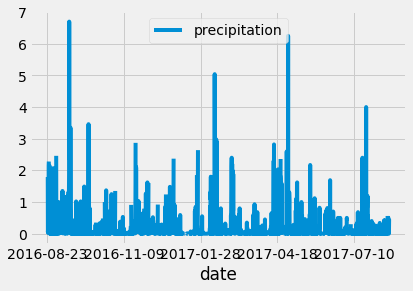

In [241]:
# Plot the data
df.plot()

In [242]:
# Generate the data summary
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [243]:
# Find the number of stations
session.query(func.count(Station.station)).all()

[(9)]

In [244]:
# Determine the most active stations
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [245]:
# Find the Low, High, and Average Temperatures
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs).filter(Measurement.station == 'USC00519281')).all()

[(53.0, 87.0, 71.66378066378067)]

In [246]:
# Plot the Highest Number of Observations
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [247]:
# Convert the Temperature Observation Results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


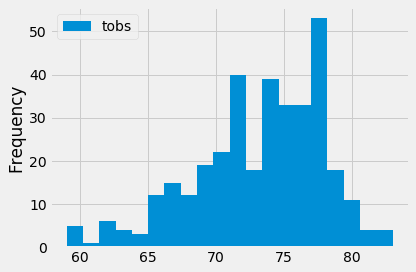

In [248]:
# Plot the Temperature Observations
df.plot.hist(bins=20)
plt.tight_layout()

In [249]:
# Challenge is below:
# Using the extract import from sqlalchemy, extract stats just for June
june_df = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [250]:
# Putting month of June stats in DataFrame
june_df = pd.DataFrame(june_df, columns=['Station', 'Date', 'Temps (June)'])
june_df.set_index(june_df['Date'], inplace=True)
june_df.sort_index(ascending=True)
print(june_df.to_string(index=False))

     Station        Date  Temps (June)
 USC00519397  2010-06-01          78.0
 USC00519397  2010-06-02          76.0
 USC00519397  2010-06-03          78.0
 USC00519397  2010-06-04          76.0
 USC00519397  2010-06-05          77.0
 USC00519397  2010-06-06          78.0
 USC00519397  2010-06-07          77.0
 USC00519397  2010-06-08          78.0
 USC00519397  2010-06-09          78.0
 USC00519397  2010-06-10          79.0
 USC00519397  2010-06-11          78.0
 USC00519397  2010-06-12          78.0
 USC00519397  2010-06-13          78.0
 USC00519397  2010-06-14          77.0
 USC00519397  2010-06-15          78.0
 USC00519397  2010-06-16          78.0
 USC00519397  2010-06-17          77.0
 USC00519397  2010-06-18          77.0
 USC00519397  2010-06-19          82.0
 USC00519397  2010-06-20          78.0
 USC00519397  2010-06-21          78.0
 USC00519397  2010-06-22          78.0
 USC00519397  2010-06-23          78.0
 USC00519397  2010-06-24          78.0
 USC00519397  2010-06-25 

In [251]:
june_df.mean()

Temps (June)    74.944118
dtype: float64

In [252]:
# Finding all relevant stats for month of June
june_df.describe()

,Temps (June)
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


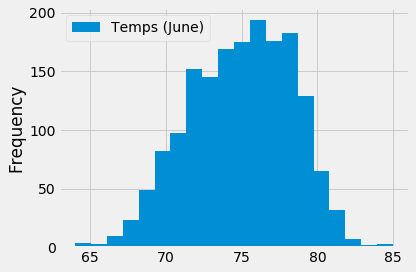

In [253]:
# Plotting Weather temps for June
june_df.plot.hist(bins=20)
plt.tight_layout()

In [254]:
# Using the extract import from sqlalchemy, extract stats just for December
dec_df = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [255]:
# Putting month of December stats in DataFrame
dec_df = pd.DataFrame(dec_df, columns=['Station', 'Date', 'Temps (December)'])
dec_df.set_index(dec_df['Date'], inplace=True)
dec_df.sort_index(ascending=True)
print(dec_df.to_string(index=False))

     Station        Date  Temps (December)
 USC00519397  2010-12-01              76.0
 USC00519397  2010-12-03              74.0
 USC00519397  2010-12-04              74.0
 USC00519397  2010-12-06              64.0
 USC00519397  2010-12-07              64.0
 USC00519397  2010-12-08              67.0
 USC00519397  2010-12-09              77.0
 USC00519397  2010-12-10              66.0
 USC00519397  2010-12-11              69.0
 USC00519397  2010-12-12              68.0
 USC00519397  2010-12-13              68.0
 USC00519397  2010-12-14              71.0
 USC00519397  2010-12-15              74.0
 USC00519397  2010-12-16              67.0
 USC00519397  2010-12-17              66.0
 USC00519397  2010-12-18              69.0
 USC00519397  2010-12-19              71.0
 USC00519397  2010-12-23              70.0
 USC00519397  2010-12-24              70.0
 USC00519397  2010-12-26              74.0
 USC00519397  2010-12-27              74.0
 USC00519397  2010-12-28              71.0
 USC0051939

In [256]:
dec_df.mean()

Temps (December)    71.041529
dtype: float64

In [257]:
# Finding all relevant stats for month of December
dec_df.describe()

,Temps (December)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


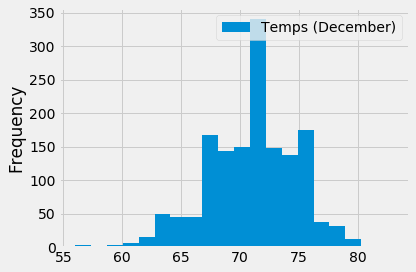

In [258]:
# Plotting Weather temps for December
dec_df.plot.hist(bins=20)
plt.tight_layout()

In [259]:
# Extracting total observations for every station in the month of June
june_tobs = session.query(Measurement.station, func.count(Measurement.station)).filter(extract('month', Measurement.date) == 6).order_by(Measurement.station).group_by(Measurement.station).all()

In [260]:
# Putting month of June total observations in a DataFrame to show how many each station has
june_tobs = pd.DataFrame(june_tobs, columns=['Station', 'Observations (June)'])
june_tobs.set_index(june_tobs['Station'], inplace=True)
june_tobs.sort_index(ascending=True)
june_tobs.index.name = None
print(june_tobs.to_string(index=False))

     Station  Observations (June)
 USC00511918                  165
 USC00513117                  236
 USC00514830                  186
 USC00516128                  223
 USC00517948                  148
 USC00518838                   38
 USC00519281                  236
 USC00519397                  236
 USC00519523                  232


In [261]:
# Finding all relevent total observation stats for June
june_tobs.describe()

,Observations (June)
count,9.000000
mean,188.888889
std,65.858645
min,38.000000
25%,165.000000
50%,223.000000
75%,236.000000
max,236.000000


In [262]:
# Extracting total observations for every station in the month of December
dec_tobs = session.query(Measurement.station, func.count(Measurement.station)).filter(extract('month', Measurement.date) == 12).order_by(Measurement.station).group_by(Measurement.station).all()

In [263]:
# Putting month of December total observations in a DataFrame to show how many each station has
dec_tobs = pd.DataFrame(dec_tobs, columns=['Station', 'Observations (December)'])
dec_tobs.set_index(dec_tobs['Station'], inplace=True)
dec_tobs.sort_index(ascending=True)
dec_tobs.index.name = None
print(dec_tobs.to_string(index=False))

     Station  Observations (December)
 USC00511918                      152
 USC00513117                      216
 USC00514830                      178
 USC00516128                      206
 USC00517948                      109
 USC00518838                       19
 USC00519281                      217
 USC00519397                      210
 USC00519523                      210


In [264]:
# Finding all relevent total observation stats for June
dec_tobs.describe()

,Observations (December)
count,9.000000
mean,168.555556
std,66.813380
min,19.000000
25%,152.000000
50%,206.000000
75%,210.000000
max,217.000000


In [265]:
# Combine both month's total observations for comparison
new_tobs = pd.merge(june_tobs, dec_tobs, on='Station')
new_tobs

,Station,Observations (June),Observations (December)
0,USC00511918,165,152
1,USC00513117,236,216
2,USC00514830,186,178
3,USC00516128,223,206
4,USC00517948,148,109
5,USC00518838,38,19
6,USC00519281,236,217
7,USC00519397,236,210
8,USC00519523,232,210


In [266]:
# Combine both dataframes to compare temperatures between them
new_stats = pd.merge(june_df, dec_df, on='Station')
new_stats

,Station,Date_x,Temps (June),Date_y,Temps (December)
0,USC00519397,2010-06-01,78.0,2010-12-01,76.0
1,USC00519397,2010-06-01,78.0,2010-12-03,74.0
2,USC00519397,2010-06-01,78.0,2010-12-04,74.0
3,USC00519397,2010-06-01,78.0,2010-12-06,64.0
4,USC00519397,2010-06-01,78.0,2010-12-07,64.0
...,...,...,...,...,...
321443,USC00516128,2017-06-30,75.0,2016-12-27,71.0
321444,USC00516128,2017-06-30,75.0,2016-12-28,71.0
321445,USC00516128,2017-06-30,75.0,2016-12-29,69.0
321446,USC00516128,2017-06-30,75.0,2016-12-30,65.0


In [267]:
# Comparisons between the two months
new_stats.describe()

,Temps (June),Temps (December)
count,321448.000000,321448.000000
mean,74.899642,70.997779
std,3.229149,3.713748
min,64.000000,56.000000
25%,72.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


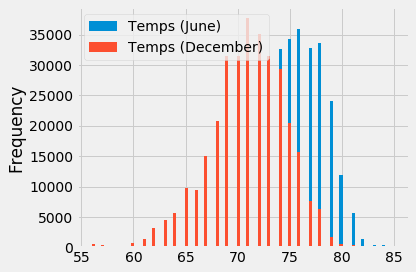

In [268]:
# Plot the statistics of each month
new_stats.plot.hist(bins=100)
plt.tight_layout()